In [75]:
"""
import modules
"""
from prepare_data import prepare_df_from_mac as prepare_data
from emulate_reduction import emulator_v2_1_np as emulate
from visualize_output import vis_emulator_v2 as v2_plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

dir(emulate)

['CtaxRedEmulator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'combi_df',
 'minimize',
 'np',
 'pd',
 'plt']

In [3]:
"""
load data
"""

PATH = 'C:/Users/toonv/Documents/PBL/Data/cost curves/'
FILENAME = 'costcurve_co2_linear.dat'

df_linear = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_co2_linear.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_cubic = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_co2_cubic.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_cubicroot = pd.read_table('C:/Users/toonv/Documents/PBL/Data/cost curves/costcurve_co2_cubicroot.dat',
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

In [4]:
"""
global variables 

year, region functie aanroepen waar je jaar en regio in kan vullen die alle stappen dan uitvoert.\\

dit zijn global constants dus kan gewoon in kleine letters

"""

YEAR = 2050
REGION = 11
STEPSIZE_CTAX_PATH = 1  # stepsize the ctax path consists of so if 2 than 2,4,6...  


In [5]:
"""
prepare data using prepare_df

input: MAC sets (df), YEAR, REGION, STEPSIZE

output: ctax paths with reduction
"""

reload(prepare_data)

lin_reduction = prepare_data.reduction_df(df_linear, YEAR, REGION)
cubic_reduction = prepare_data.reduction_df(df_cubic, YEAR, REGION)
root_reduction = prepare_data.reduction_df(df_cubicroot, YEAR, REGION)

lin_paths = prepare_data.find_path(lin_reduction, STEPSIZE_CTAX_PATH, 'linear')
cubic_paths = prepare_data.find_path(cubic_reduction, STEPSIZE_CTAX_PATH, 'cubic')
root_paths = prepare_data.find_path(root_reduction, STEPSIZE_CTAX_PATH, 'cubicroot')

root_paths.tail()

,0,1,2,3,4,5,6,7,8,9,10,reduction
196,0.0,1819.502823,2292.429907,2624.177164,2888.280695,3111.306062,3306.256048,3480.583687,3639.005646,3784.718388,3920.0,89.5883
197,0.0,1828.786000,2304.125978,2637.565823,2903.016821,3127.180072,3323.124701,3498.341767,3657.572001,3804.028175,3940.0,89.6167
198,0.0,1838.069178,2315.822049,2650.954482,2917.752947,3143.054083,3339.993355,3516.099847,3676.138356,3823.337963,3960.0,89.6401
199,0.0,1847.352356,2327.518120,2664.343141,2932.489073,3158.928093,3356.862008,3533.857927,3694.704712,3842.647751,3980.0,89.6573
200,0.0,1856.635533,2339.214191,2677.731800,2947.225199,3174.802104,3373.730661,3551.616007,3713.271067,3861.957538,4000.0,89.6721


C:\Users\toonv\Documents\PBL\Code\Emulator\emulate_reduction\emulator_v2_1_np.py:62: RuntimeWarning: invalid value encountered in true_divide
  delta_c_norm = (self.lin_path - self.train_path) / self.lin_path[-1]


            0           1          2           3           4  ctax
0   33.921931 -113.362727 -74.142323 -163.768772  115.510755     0
1   59.247060 -113.333301 -76.123765 -157.134388   82.248172   200
2   84.969761 -190.096513 -75.378552   22.426979   48.712540   400
3   51.774015 -145.756888   1.048328   39.345703    1.087955   600
4   -3.108708   -0.228852   0.290782    0.202473    1.741385   800
5   -5.146606   -0.379462   0.480415    0.335172    2.883675  1000
6   -4.517726   -1.627851  -0.300484   -0.771104    3.857872  1200
7   -2.573657   -1.962673  -3.510341   -3.274095    2.441411  1400
8   -2.313571   -2.234224  -2.944863   -6.442219    2.936656  1600
9   -1.505201   -3.866199  -1.278661   -5.280086    4.687068  1800
10  -0.722100   -2.616529  -1.120805   -5.515072    4.355681  2000
11  -0.251601   -2.362526  -1.000202   -3.292561    2.584309  2200
12   0.071618   -1.242900  -0.527159   -6.138513    2.768281  2400
13   0.340228   -2.266513  -0.913646   -3.336539    2.393259  

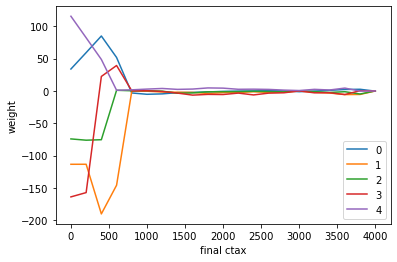

In [235]:
"""
train prepared dataframe 

input: ctax paths with reduction

output: trained dataset
"""

reload(emulate)

# only for this emulator we use combination of paths tot train and test
combi_paths = emulate.combi_df(cubic_paths, root_paths, cubic_reduction, root_reduction)

x = emulate.CtaxRedEmulator(lin_paths, combi_paths)

x.train_ctax_path(10, 200, 5)

# do it for all remaining test paths
cubic_test = []
root_test = []
    
# for i in range(1, len(root_paths), 2):
        
#     cubic_test.append(x.test_ctax_path(root_paths.loc[i]))
#     root_test.append(x.test_ctax_path(cubic_paths.loc[i+1]))



In [227]:
root_paths.head()

,0,1,2,3,4,5,6,7,8,9,10,reduction
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0000
1,0.0,9.283178,11.696071,13.388659,14.736126,15.874011,16.868653,17.75808,18.566355,19.309788,20.0,22.4967
2,0.0,18.566355,23.392142,26.777318,29.472252,31.748021,33.737307,35.51616,37.132711,38.619575,40.0,24.5504
3,0.0,27.849533,35.088213,40.165977,44.208378,47.622032,50.605960,53.27424,55.699066,57.929363,60.0,26.8447
4,0.0,37.132711,46.784284,53.554636,58.944504,63.496042,67.474613,71.03232,74.265421,77.239151,80.0,28.8845


No handles with labels found to put in legend.


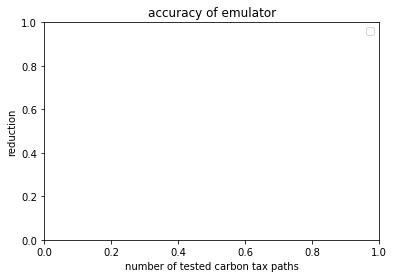

In [232]:
"""
Figures showing the emulated reduction vs real reduction

Also calculation of MSE

zelfde kleuren maar andere weergave
"""

reload(v2_plot)

v2_plot.emulator_v2_graphs(cubic_test, root_test)

In [266]:
x = np.array([0,1 ,2 ,3, 4])

y = x**3

y

y = 200* x**3/x[-1]**3

y

array([  0.   ,   3.125,  25.   ,  84.375, 200.   ])